In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

import warnings
warnings.filterwarnings("ignore")

In [2]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(path="imdb.npz",
                                                       num_words=None,
                                                       skip_top=0,
                                                       maxlen=None,
                                                       seed=113,
                                                       start_char=1,
                                                       oov_char=2,
                                                       index_from=3)

In [3]:
print("Type", type(X_train))

Type <class 'numpy.ndarray'>


In [4]:
print("X_train shape: ", X_train.shape)

X_train shape:  (25000,)


In [5]:
print("Y_Train shape:", Y_train.shape)

Y_Train shape: (25000,)


In [6]:
print("Y train values: ", np.unique(Y_train))
print("Y test values: ", np.unique(Y_test))

Y train values:  [0 1]
Y test values:  [0 1]


In [7]:
unique, counts = np.unique(Y_train, return_counts = True)
print("Y train distribution: ",dict(zip(unique,counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [8]:
unique, counts = np.unique(Y_test, return_counts = True)
print("Y test distribution: ",dict(zip(unique,counts)))

Y test distribution:  {0: 12500, 1: 12500}


Text(0.5, 1.0, 'Y test')

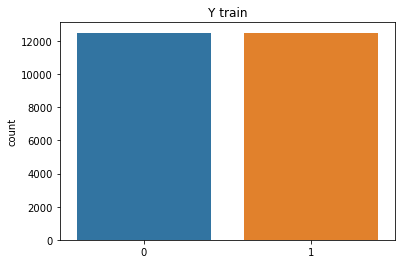

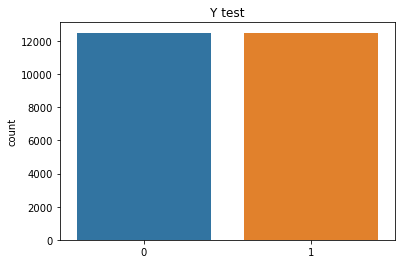

In [9]:
plt.figure()
sns.countplot(Y_train)
plt.title("Y train")

plt.figure()
sns.countplot(Y_test)
plt.title("Y test")

In [10]:
print(X_train[0], type(X_train[0][0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] <class 'int'>


In [11]:
review_len_train = []
review_len_test = []

for i, ii in zip(X_train, X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

<AxesSubplot:ylabel='Density'>

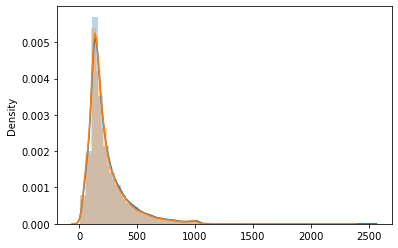

In [12]:
sns.distplot(review_len_train, hist_kws = {"alpha":0.3})
sns.distplot(review_len_test, hist_kws= {"alpha":0.3})

In [13]:
print("Train mean: ", np.mean(review_len_train))
print("Train median: ", np.median(review_len_train))

Train mean:  238.71364
Train median:  178.0


In [14]:
word_index = imdb.get_word_index()
print(type(word_index))
print(len(word_index))

<class 'dict'>
88584


In [15]:
for keys, values in word_index.items():
    if values == 1:
        print(keys)

the


In [16]:
def whatItSay(index = 24):
    reverse_index = dict([(value, key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

decoded_review = whatItSay(36)

! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up
0


In [17]:
num_word =15000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_word)

In [18]:
maxlen = 130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [19]:
print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


In [20]:
for i in X_train[0:10]:
    print(len(i))

130
130
130
130
130
130
130
130
130
130


In [21]:
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


In [22]:
rnn = Sequential()
rnn.add(Embedding(num_word, 32, input_length=len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape=(num_word,maxlen), return_sequences=False, activation="relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))
print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 32)           480000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
history = rnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size = 128, verbose=1)

Epoch 1/5
196/196 [==============================] - 10s 49ms/step - loss: 0.6606 - accuracy: 0.6168 - val_loss: 0.6235 - val_accuracy: 0.6388
Epoch 2/5
196/196 [==============================] - 9s 45ms/step - loss: 0.4802 - accuracy: 0.7824 - val_loss: 0.4445 - val_accuracy: 0.7922
Epoch 3/5
196/196 [==============================] - 9s 45ms/step - loss: 0.3598 - accuracy: 0.8456 - val_loss: 0.3946 - val_accuracy: 0.8300
Epoch 4/5
196/196 [==============================] - 9s 45ms/step - loss: 0.2879 - accuracy: 0.8828 - val_loss: 0.3426 - val_accuracy: 0.8532
Epoch 5/5
196/196 [==============================] - 9s 46ms/step - loss: 0.2481 - accuracy: 0.9018 - val_loss: 0.3476 - val_accuracy: 0.8564


In [24]:
score = rnn.evaluate(X_test, Y_test)
print("Accuracy: %", score[1]*100)

782/782 [==============================] - 9s 11ms/step - loss: 0.3476 - accuracy: 0.8564
Accuracy: % 85.6440007686615


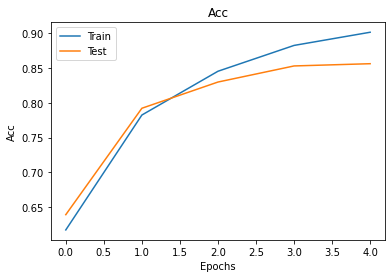

In [25]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()

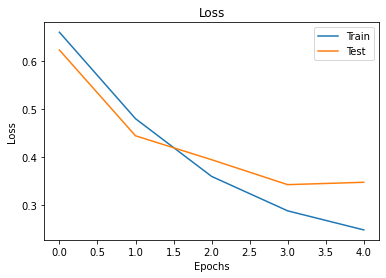

In [26]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()